# Biodiversity in National Parks

### Author: Alexander K.

## Overview
This project interprets data from the National Parks Service about endangered species in different parks.


## Project Goals
- Performing data analysis on the conservation statuses of endangered species
- Investigate the patterns related to the types of species that become endangered
- Visualize the data to understand trends and distributions of endangered species across different national parks


## Actions

- analyze data;
- clean up the datasets;
- visualize the data using graphs and charts;
- seek to answer the questions;
- making conclusions based on the analysis.

## Data

There are two datasets:
1. Species data - contains information about different species, including their conservation status.
2. Observations data - contains records of species observed in various national parks, including the date and location of the observation.

## Analysis

fill in later

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

In [4]:
# load the datasets

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [5]:
# inspecting species dataset
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
# inspecting species dataset
print(f"The shape of the species dataset is - {species.shape}")
print()
print(species.info())

The shape of the species dataset is - (5824, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


There are 5824 rows and 4 columns in the species dataset:
* category - class of animal
* scientific_name - the scientific name of each species
* common_name - the common names of each species
* conservation_status - each species’ current conservation status

In [7]:
# inspecting observations dataset
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [8]:
# inspecting observations dataset
print(f"The shape of the observations dataset is - {observations.shape}")
print()
print(observations.info())

The shape of the observations dataset is - (23296, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


There are 23296 rows and 3 columns in the observations dataset:
* scientific_name - the scientific name of each species
* park_name - Park where species were found
* observations - the number of times each species was observed at park

## Exploratory Data Analysis (EDA)

In [9]:
# describing the species dataset
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [10]:
# counting the number of values in the 'category' column
species['category'].value_counts()

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

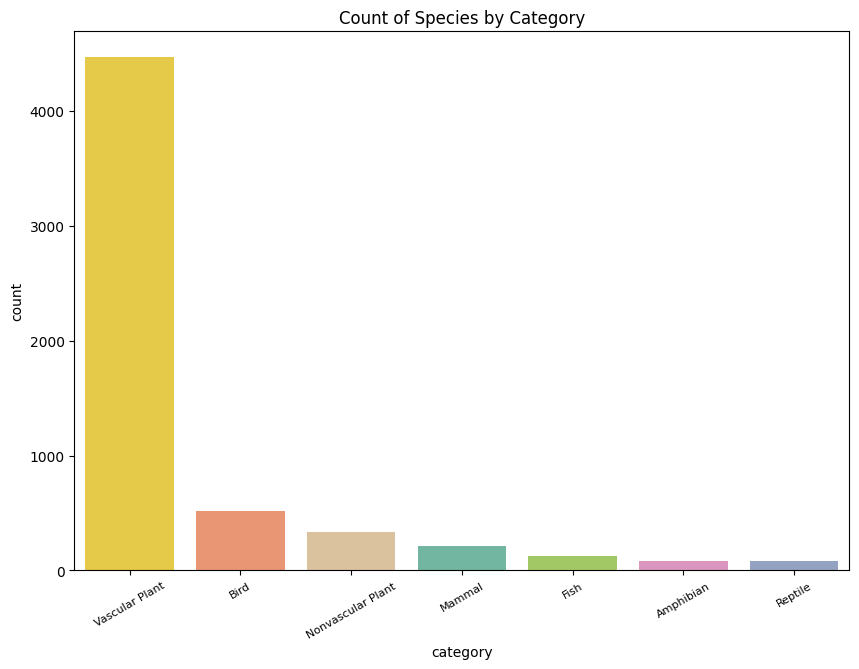

In [11]:
# creating a countplot for the 'category' column
plt.figure(figsize=(10, 7), frameon=True)
sns.countplot(data=species, x='category', hue='category', palette='Set2', order=species['category'].value_counts().index, legend=False)
plt.title('Count of Species by Category')
plt.xticks(rotation=30, fontsize=8)
plt.show()

In [ ]:
# select category and conservation status, group by conservation_status, and count category status
# using .unstack() to pivot the table; fill missing values with 0
conservationCategory = species[['category', 'conservation_status']].groupby('conservation_status').value_counts().unstack().fillna(0).astype(int)
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,7,0,0,1
In Recovery,0,3,0,1,0,0,0
Species of Concern,4,72,4,28,5,5,43
Threatened,2,0,4,2,0,0,2


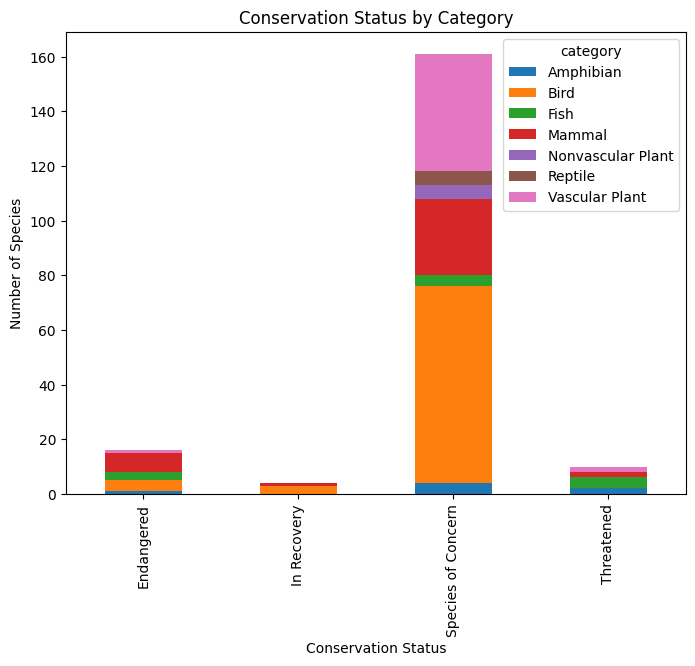

In [22]:
# creating stacked bar plot for conservation status by category
conservationCategory.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Conservation Status by Category')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.show()